In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("social_media_data.csv")
df.head()

,Post_ID,Platform,Username,Post_Date,Post_Type,Likes,Comments,Shares,Views
0,P001,Instagram,tech_world,2025-01-05,Image,1200,85,45,15000
1,P002,Facebook,foodie_life,2025-01-06,Video,980,120,60,22000
2,P003,Twitter,news_daily,2025-01-06,Text,450,60,110,8000
3,P004,Instagram,travel_diaries,2025-01-07,Reel,2300,190,210,45000
4,P005,LinkedIn,data_analyst,2025-01-08,Article,650,40,90,12000


In [15]:
df["Post_Text"] = [
    "Amazing tech innovation, loved it",
    "The food was delicious and awesome",
    "This is bad news and very disappointing",
    "Traveling makes me happy and excited",
    "Great career tips for data analysts",
    "Python tutorial is excellent and helpful",
    "Fitness is good for health",
    "Startup growth is slow and risky",
    "Fashion trends look beautiful",
    "Marketing strategy is very effective"
]

In [16]:
def get_sentiment_score(text):
    positive_words = [
        "amazing","loved","delicious","awesome",
        "happy","excited","great","excellent",
        "good","beautiful","effective"
    ]
    
    negative_words = [
        "bad","disappointing","slow","risky"
    ]
    
    score = 0
    for word in positive_words:
        if word in text.lower():
            score += 1
    for word in negative_words:
        if word in text.lower():
            score -= 1
            
    return score

In [17]:
df["Sentiment_Score"] = df["Post_Text"].apply(get_sentiment_score)
df[["Post_Text", "Sentiment_Score"]]

,Post_Text,Sentiment_Score
0,"Amazing tech innovation, loved it",2
1,The food was delicious and awesome,2
2,This is bad news and very disappointing,-2
3,Traveling makes me happy and excited,2
4,Great career tips for data analysts,1
5,Python tutorial is excellent and helpful,1
6,Fitness is good for health,1
7,Startup growth is slow and risky,-2
8,Fashion trends look beautiful,1
9,Marketing strategy is very effective,1


In [18]:
df["Sentiment"] = df["Sentiment_Score"].apply(
    lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral")
)

df[["Post_Text", "Sentiment"]]

,Post_Text,Sentiment
0,"Amazing tech innovation, loved it",Positive
1,The food was delicious and awesome,Positive
2,This is bad news and very disappointing,Negative
3,Traveling makes me happy and excited,Positive
4,Great career tips for data analysts,Positive
5,Python tutorial is excellent and helpful,Positive
6,Fitness is good for health,Positive
7,Startup growth is slow and risky,Negative
8,Fashion trends look beautiful,Positive
9,Marketing strategy is very effective,Positive


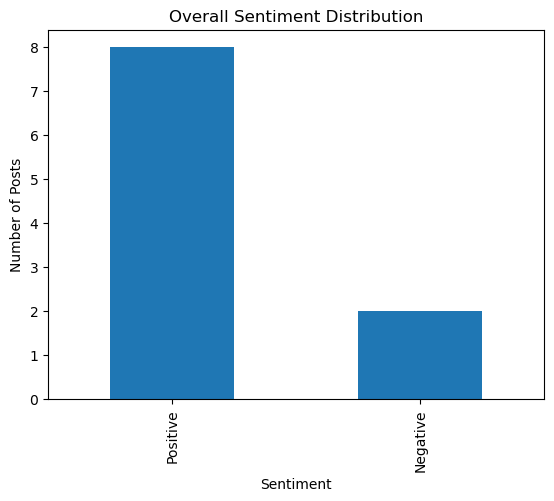

In [19]:
plt.figure()
df["Sentiment"].value_counts().plot(kind="bar")
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Posts")
plt.show()

In [20]:
platform_sentiment = pd.crosstab(df["Platform"], df["Sentiment"])
platform_sentiment

Sentiment,Negative,Positive
Platform,,
Facebook,0,2
Instagram,0,3
LinkedIn,0,2
Twitter,2,0
YouTube,0,1


<Figure size 640x480 with 0 Axes>

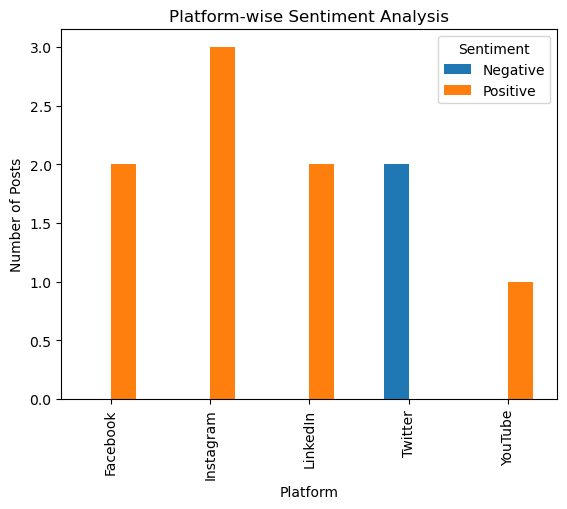

In [21]:
plt.figure()
platform_sentiment.plot(kind="bar")
plt.title("Platform-wise Sentiment Analysis")
plt.xlabel("Platform")
plt.ylabel("Number of Posts")
plt.show()

In [22]:
df.to_csv("sentiment_analyzed_social_media_data.csv", index=False)